In [ ]:
import numpy as np
import pandas as pd 
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

from sklearn import preprocessing
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn import metrics

In [ ]:
AB_DATA = pd.read_csv('AB_NYC_2019.csv')
AB_DATA.head()

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,2539,Clean & quiet apt home by the park,2787,John,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,2018-10-19,0.21,6,365
1,2595,Skylit Midtown Castle,2845,Jennifer,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,2019-05-21,0.38,2,355
2,3647,THE VILLAGE OF HARLEM....NEW YORK !,4632,Elisabeth,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3,0,NaN,NaN,1,365
3,3831,Cozy Entire Floor of Brownstone,4869,LisaRoxanne,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,1,270,2019-07-05,4.64,1,194
4,5022,Entire Apt: Spacious Studio/Loft by central park,7192,Laura,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80,10,9,2018-11-19,0.10,1,0


In [ ]:
#Check for NULL values
AB_DATA.isnull().sum()

id                                    0
name                                 16
host_id                               0
host_name                            21
neighbourhood_group                   0
neighbourhood                         0
latitude                              0
longitude                             0
room_type                             0
price                                 0
minimum_nights                        0
number_of_reviews                     0
last_review                       10052
reviews_per_month                 10052
calculated_host_listings_count        0
availability_365                      0
dtype: int64

In [ ]:
#Replace the null values with 0
AB_DATA['host_name'].fillna(value=0, inplace=True)
AB_DATA['reviews_per_month'].fillna(value=0, inplace=True)
AB_DATA['name'].fillna(value=0, inplace=True)
AB_DATA['last_review'].fillna(value=0, inplace=True)
AB_DATA.isnull().sum()

id                                0
name                              0
host_id                           0
host_name                         0
neighbourhood_group               0
neighbourhood                     0
latitude                          0
longitude                         0
room_type                         0
price                             0
minimum_nights                    0
number_of_reviews                 0
last_review                       0
reviews_per_month                 0
calculated_host_listings_count    0
availability_365                  0
dtype: int64

In [ ]:
#Drop all the ID and unique name columns
AB_DATA.drop(['name', 'host_name', 'last_review', 'id','host_id'], inplace=True, axis=1)

#### Exploratory Data Analysis

Text(0, 0.5, 'Frequency')

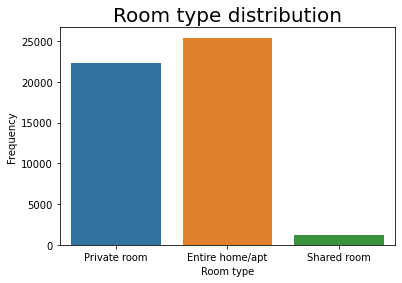

In [ ]:
# Plot1 : Room type distribution
sns.countplot(data=AB_DATA, x='room_type')
plt.title('Room type distribution', fontsize=20)
plt.xlabel('Room type')
plt.ylabel("Frequency")

Text(0, 0.5, 'Frequency')

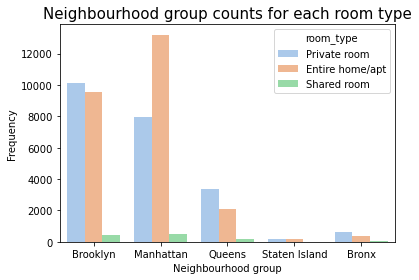

In [ ]:
# Plot2 : Neighbourhood group counts for each room_type

sns.countplot(data=AB_DATA, x='neighbourhood_group', hue='room_type', palette='pastel')
plt.title('Neighbourhood group counts for each room type', fontsize=15)
plt.xlabel('Neighbourhood group')
plt.ylabel("Frequency")

Text(0.5, 1.0, 'Features Correlation')

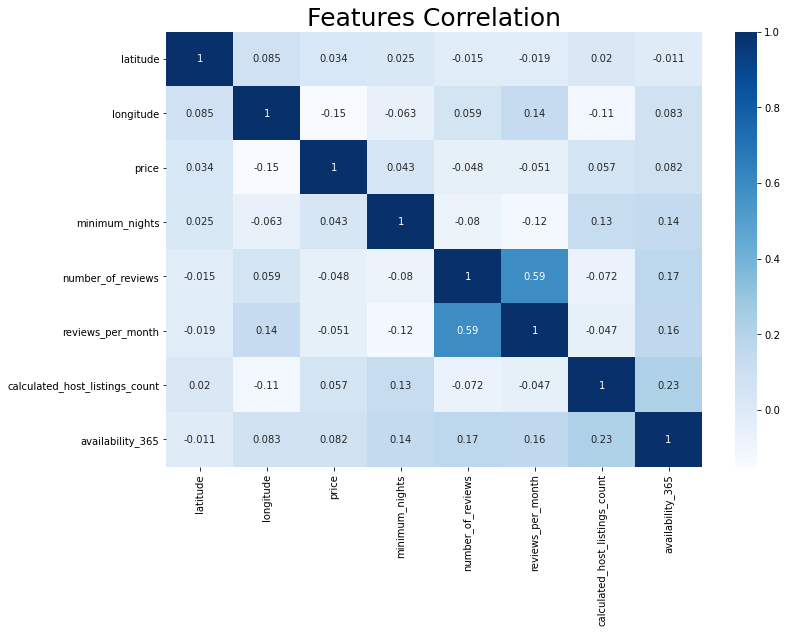

In [ ]:
# Plot3 : Correlation for every field

plt.figure(figsize=(12,8))
sns.heatmap(AB_DATA.corr(), annot=True, cmap='Blues')
plt.title('Features Correlation', fontsize=25)

In [ ]:
#Processing of categorical fields using LabelEncoder
cat_p = preprocessing.LabelEncoder()
#Neighbourhood_group field
cat_p.fit(AB_DATA['neighbourhood_group'])
AB_DATA['neighbourhood_group']=cat_p.transform(AB_DATA['neighbourhood_group'])
#room_type field
cat_p.fit(AB_DATA['room_type'])
AB_DATA['room_type']=cat_p.transform(AB_DATA['room_type'])
#neighbourhood field
cat_p.fit(AB_DATA['neighbourhood'])
AB_DATA['neighbourhood']=cat_p.transform(AB_DATA['neighbourhood'])

In [ ]:
#all the categorical fields are successfully transformed
AB_DATA.head()

,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
0,1,108,40.64749,-73.97237,1,149,1,9,0.21,6,365
1,2,127,40.75362,-73.98377,0,225,1,45,0.38,2,355
2,2,94,40.80902,-73.94190,1,150,3,0,0.00,1,365
3,1,41,40.68514,-73.95976,0,89,1,270,4.64,1,194
4,2,61,40.79851,-73.94399,0,80,10,9,0.10,1,0


In [ ]:
#AB_DATA.sort_values('price', ascending=True, inplace=True)
#AB_DATA = AB_DATA[11:-6]

In [ ]:
lr = LinearRegression()
X = AB_DATA.drop(['price'], axis=1)
y = AB_DATA['price']

#Split the data into 70-30 ratio using train test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=101)

In [ ]:
#train the model using linear regression
lr.fit(X_train, y_train)

LinearRegression()

In [ ]:
#Predict the X_test test
predictions = lr.predict(X_test)

In [ ]:
# Evaluation metrics used are MAE, RMSE and R2 score

mae = metrics.mean_absolute_error(y_test, predictions)
rmse = np.sqrt(metrics.mean_squared_error(y_test, predictions))
r2 = metrics.r2_score(y_test, predictions)

print('Mean Absolute Error: %s' %mae)
print('Root mean squared error: %s' %rmse)
print('R2 score: %s' %r2)

Mean Absolute Error: 76.36041676652167
Root mean squared error: 235.6481607639627
R2 score: 0.09224880690392201
